# (Title Here)
Hans Darmawan - JCDS2602

# 1. Business Understanding

Electronic mail (email) is defined as a method of electronic messaging that can occur via direct computer links, local area networks, or wide area networks, typically involving messages sent between specific electronic mailboxes. Email messages are composed, transmitted, and received through a system of mail servers and clients following established protocols such as SMTP and POP3. Unique email addresses are assigned using Internet conventions to ensure proper routing and delivery of messages. Headers are added and modified by various mail servers during the transmission process to track the message’s journey and provide metadata. Email software features and security considerations have been outlined, emphasizing the speed, convenience, and necessary precautions when handling electronic mail (Sennewald & Baillie, 2016).

Email spam, also known as junk email, is defined as unsolicited messages sent in bulk, often by botnets controlled by attackers. It is estimated that about half of the 350 billion daily emails in 2023 were spam, causing significant costs and risks to businesses and individuals. Various techniques such as botnets, snowshoe spam, and image spam are employed to distribute these messages. Spam emails often contain commercial content with financial motives or malicious links designed to steal information or spread malware. Efforts to combat spam include legal regulations, advanced filtering technologies, and user education to identify and report suspicious emails (Kirvan, Awati, & Teravainen, 2024).

Email spamming significantly impacts both users and organizations by causing wasted time, increased bandwidth usage, and potential security risks such as phishing attacks and malware distribution (Almeida, Almeida & Yamakami, 2011). According to Metsis et al. (2006), a confusion matrix helps evaluate the performance of a spam filter by categorizing outcomes into four types In the context of spam detection, which are:
- A true positive (TP) occurs when a spam email is correctly identified as spam.
- A true negative (TN) is when a legitimate email is correctly classified as not spam. 
- A false positive (FP) happens when a legitimate email is incorrectly marked as spam, causing important messages to be missed. 
- A false negative (FN) is when a spam email is mistakenly classified as legitimate, allowing unwanted content to reach the user’s inbox. 

In the context of email spam filtering, false negatives (FNs) are generally more dangerous than false positives (FPs) because false negatives allow harmful spam—such as phishing or malware emails—to reach the user's inbox, potentially causing significant financial losses, data breaches, and security compromises (Guzella & Caminhas, 2009). False positives, while inconvenient because legitimate emails are wrongly classified as spam, usually result in missed or delayed communication rather than direct harm. Financially, the cost of a false negative can be modeled as the expected loss from a successful attack or fraud, and the cost of a false positive is the operational cost of recovering missed legitimate messages. For example, if the average financial loss per false negative is 5,000 USD and the cost per false positive is 100 USD, then the total expected loss is calculated as:

     (number of false negatives × 5,000) + (number of false positives × 100). 

Therefore, reducing false negatives is critical to minimizing overall risk and financial damage caused by spam emails.

# 2. Data Understanding

The Spambase dataset, created in 1999 and last updated in 2023, is used for classifying emails as spam or non-spam. It contains 4,601 instances with 57 features, including word and character frequencies and statistics on capital letter sequences. The dataset aims to help build filters that accurately distinguish spam, minimizing false positives, which are particularly undesirable. Typical classification error rates are around 7%. The dataset was developed by Hopkins, Reeber, Forman, and Suermondt and is publicly available through the UCI Machine Learning Repository (Hopkins et al., 1999).

In [1]:
import pandas as pd

real_df = pd.read_csv('spambase.csv')
df = real_df.copy()
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Spambase Dataset Summary (DataFrame Info)

- **Number of instances (rows):** 4601  
- **Number of columns (features + target):** 58  

### Columns and Data Types:
- 55 columns are of type `float64` representing continuous numerical features.
- 3 columns are of type `int64`, including:
  - `capital_run_length_longest`
  - `capital_run_length_total`
  - `Class` (target variable)

### Class Label Description

- **Class 0:** Non-spam email (legitimate email)
- **Class 1:** Spam email (unsolicited commercial email)


### Feature Description:
- Columns 0 to 47 (`word_freq_*` and `char_freq_*`) represent the frequency of specific words or characters in an email, expressed as percentages (float values).
- Columns 48 to 53 (`char_freq_;`, `char_freq_(`, etc.) are character frequency features.
- Columns 54 to 56 represent statistics related to sequences of capital letters:
  - `capital_run_length_average` (float): average length of uninterrupted capital letter sequences.
  - `capital_run_length_longest` (int): length of the longest uninterrupted capital letter sequence.
  - `capital_run_length_total` (int): total number of capital letters in the email.
- Column 57 (`Class`) is the target variable indicating whether an email is spam (1) or not (0).

## Missing Values Checking

In [2]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Confirmed that there are no missing values in this dataset, which means all columns have 4601 non-null entries.

## Duplicates Checking

In [3]:
df.duplicated().sum()

391

This dataset contains 391 duplicate entries. These duplicates represent repeated rows that are identical across all features and the target. It may be beneficial to remove or handle these duplicates before training models to avoid bias or overfitting, but it will be considered later.

## Proportion of Spam vs Non-Spam Emails

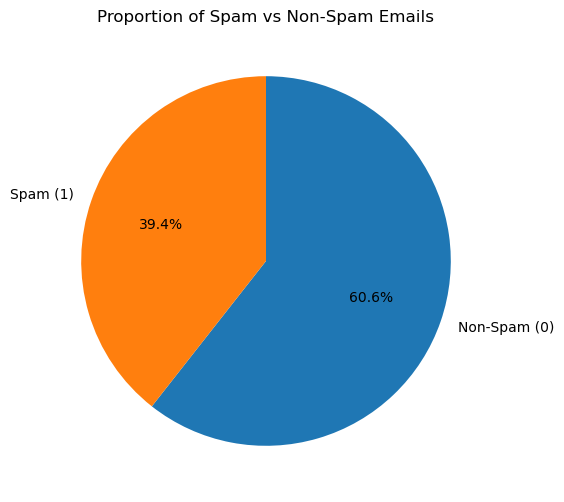

In [4]:
import matplotlib.pyplot as plt

# Calculate class proportions
class_counts = df['Class'].value_counts()
class_labels = ['Non-Spam (0)', 'Spam (1)']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Proportion of Spam vs Non-Spam Emails')
plt.show()

The dataset has approximately 60.6% non-spam emails (majority class) and 39.4% spam emails (minority class). This distribution is relatively **close to balanced**. A dataset is often considered imbalanced when one class significantly outnumbers the other, commonly when the minority class represents less than 20-30% of the data (He & Garcia, 2009; Johnson & Khoshgoftaar, 2019). Such a distribution allows standard classification algorithms to perform well without requiring extensive imbalance-handling techniques.

## Word Cloud and Frequency Analysis

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Generate list of word frequency columns using list comprehension
word_freq_cols = [col for col in df.columns if col.startswith('word_freq_')]

def create_wordcloud(data, title):
    # Convert word frequencies to a dictionary suitable for WordCloud
    word_freq_dict = {col.replace('word_freq_', ''): data[col].mean() for col in word_freq_cols}
    
    # Generate wordcloud
    wc = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)
    
    # Plot
    plt.figure(figsize=(14, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

def plot_word_freq_distribution(data, title):
    # Calculate mean frequencies for each word feature
    mean_freq = data[word_freq_cols].mean().sort_values(ascending=False)
    
    # Plot distribution as barplot without palette to avoid warning
    plt.figure(figsize=(14, 6))
    sns.barplot(x=mean_freq.index.str.replace('word_freq_', ''), y=mean_freq.values)
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Average Frequency (%)')
    plt.title(title)
    plt.tight_layout()
    plt.show()


This code analyzes word frequencies in email data by first identifying all columns related to word counts. It then creates two types of visualizations: a word cloud and a bar chart. The word cloud displays words sized according to their average frequency in a selected group of emails (e.g., spam or non-spam), making it easy to see which words are most common. The bar chart presents the same information as sorted bars, allowing precise comparison of average word frequencies across the dataset. Together, these visualizations help highlight key words that differentiate spam from non-spam emails.

Using the average (mean) to analyze word and character frequencies in email classification tasks provides a clear and effective measure of central tendency, especially in large datasets like Spambase. The mean captures the typical frequency of features across instances, facilitating straightforward comparison between classes such as spam and non-spam. While alternatives like the median or mode are useful in skewed or heavily zero-inflated data, they often yield less informative results in this context, as many word frequencies tend to be zero. Thus, the mean offers a more stable and interpretable summary for distinguishing feature importance during exploratory data analysis and visualization (Kuhn & Johnson, 2019; James et al., 2013).

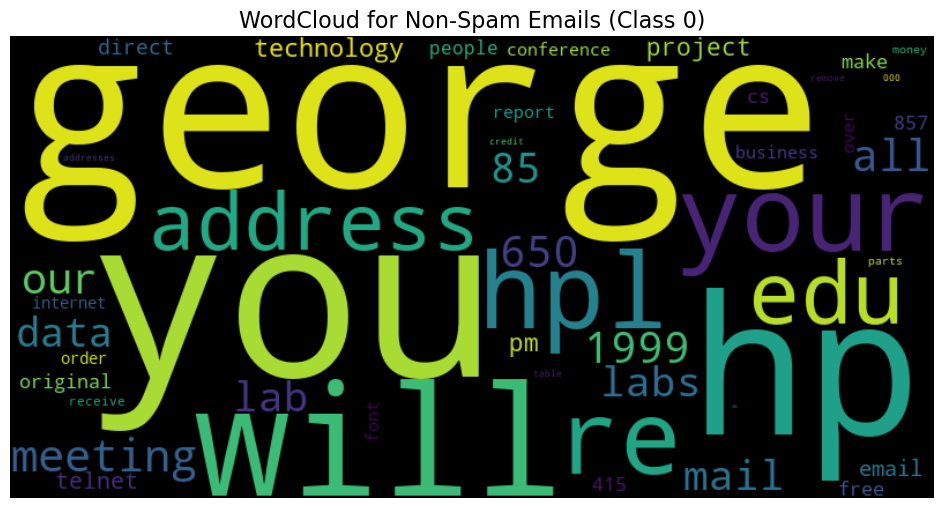

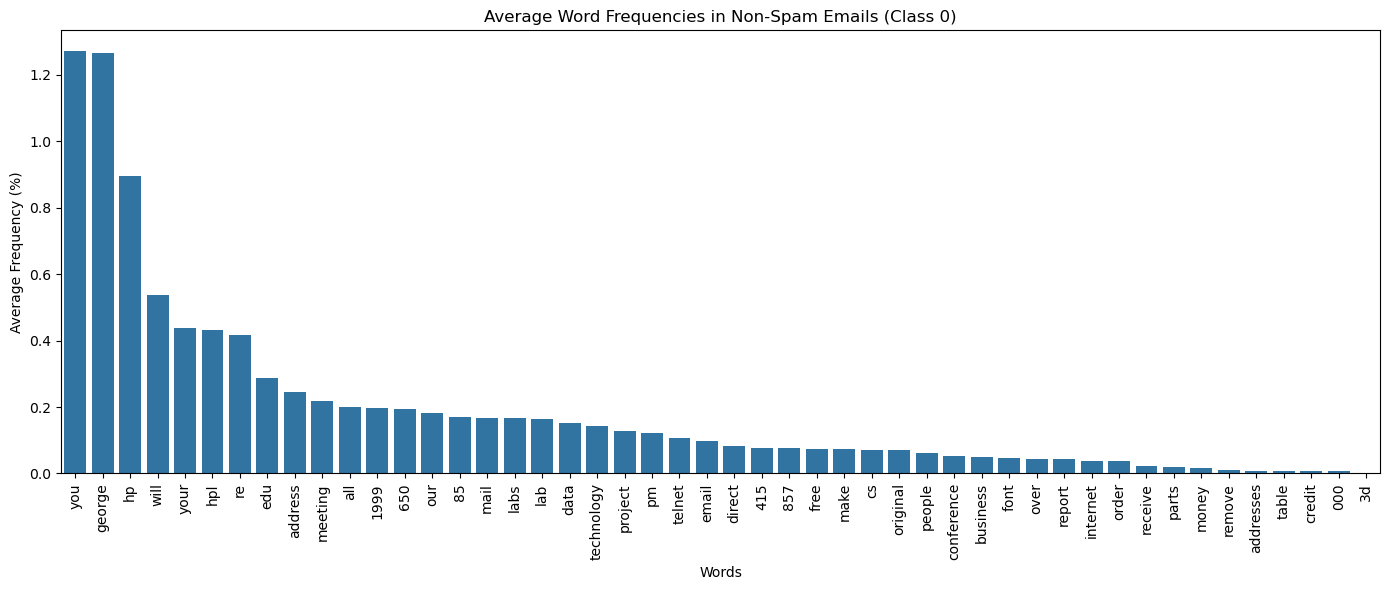

In [6]:
# Create wordcloud for Non-Spam emails (Class 0)
create_wordcloud(df[df['Class'] == 0], "WordCloud for Non-Spam Emails (Class 0)")

# Plot distribution for Non-Spam emails (Class 0)
plot_word_freq_distribution(df[df['Class'] == 0], "Average Word Frequencies in Non-Spam Emails (Class 0)")

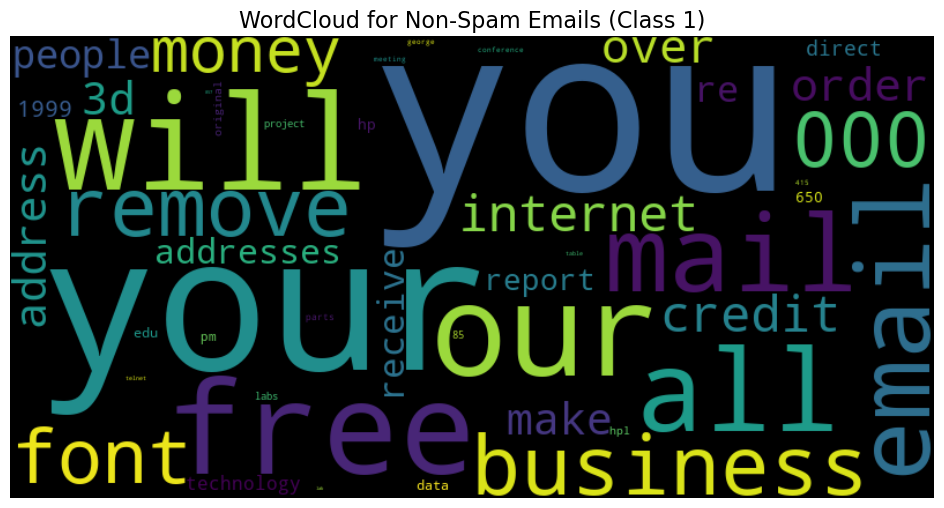

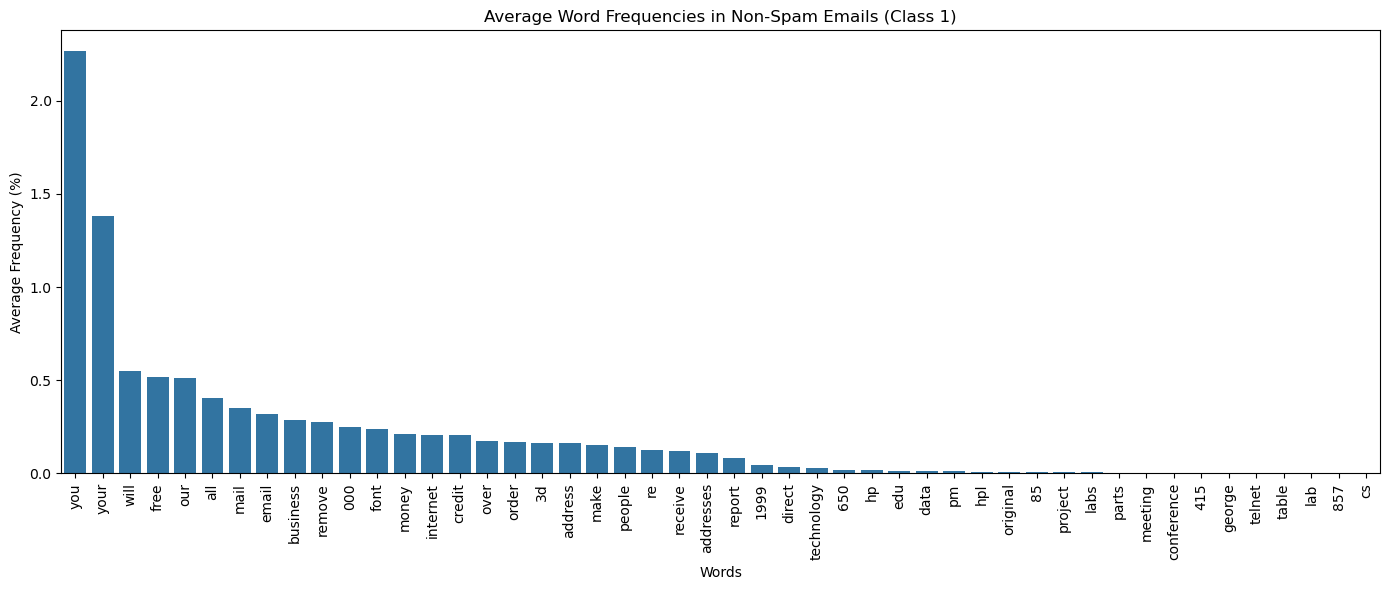

In [7]:
# Create wordcloud for Non-Spam emails (Class 1)
create_wordcloud(df[df['Class'] == 1], "WordCloud for Non-Spam Emails (Class 1)")

# Plot distribution for Non-Spam emails (Class 1)
plot_word_freq_distribution(df[df['Class'] == 1], "Average Word Frequencies in Non-Spam Emails (Class 1)")

## Character Frequency Analysis

In [8]:
# List of character frequency columns
char_freq_cols = [col for col in df.columns if col.startswith('char_freq_')]

def plot_char_freq_distribution(data, title):
    # Calculate mean frequencies for each character feature
    mean_freq = data[char_freq_cols].mean().sort_values(ascending=False)
    
    # Plot distribution as barplot without palette to avoid warning
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_freq.index.str.replace('char_freq_', ''), y=mean_freq.values)
    plt.xticks(rotation=0)
    plt.xlabel('Characters')
    plt.ylabel('Average Frequency (%)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

This code focuses on analyzing character frequencies in email data by first selecting all columns related to character counts. It calculates the average frequency of each character feature within a chosen subset of emails (such as spam or non-spam) and visualizes these averages using a bar chart. The chart displays characters on the x-axis and their mean frequencies on the y-axis, allowing clear comparison of how often different characters appear across email classes. This approach helps identify distinctive character usage patterns that may differentiate spam from non-spam emails. Using the average frequency as a measure provides a reliable and interpretable summary of typical character occurrence, which is especially useful in large datasets like Spambase. While other statistics like the median can be informative in skewed data, the mean generally offers a clearer comparison for exploratory analysis and visualization purposes (Kuhn & Johnson, 2019; James et al., 2013).

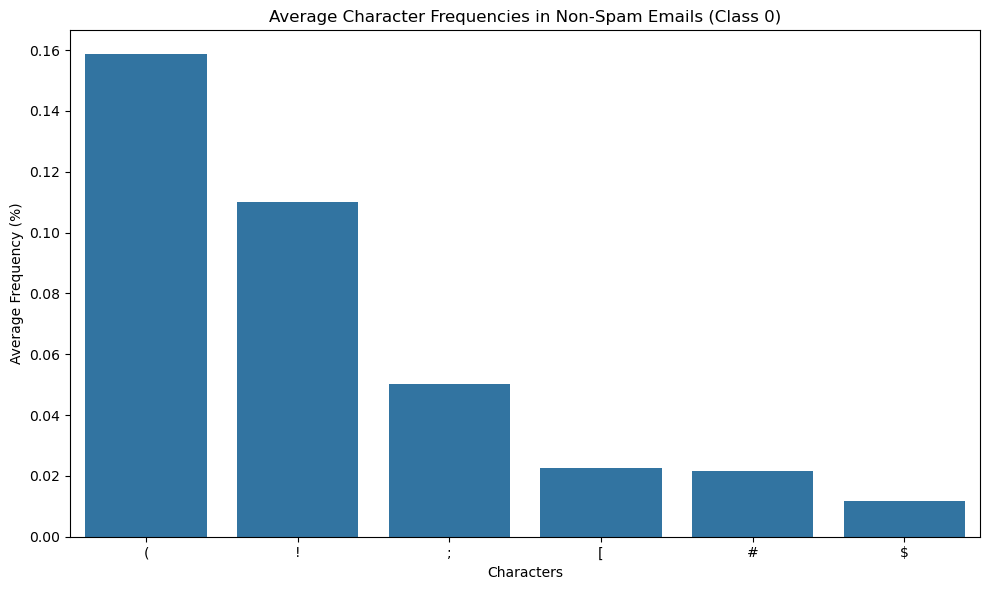

In [9]:
# Plot distribution for Non-Spam emails (Class 0)
plot_char_freq_distribution(df[df['Class'] == 0], "Average Character Frequencies in Non-Spam Emails (Class 0)")

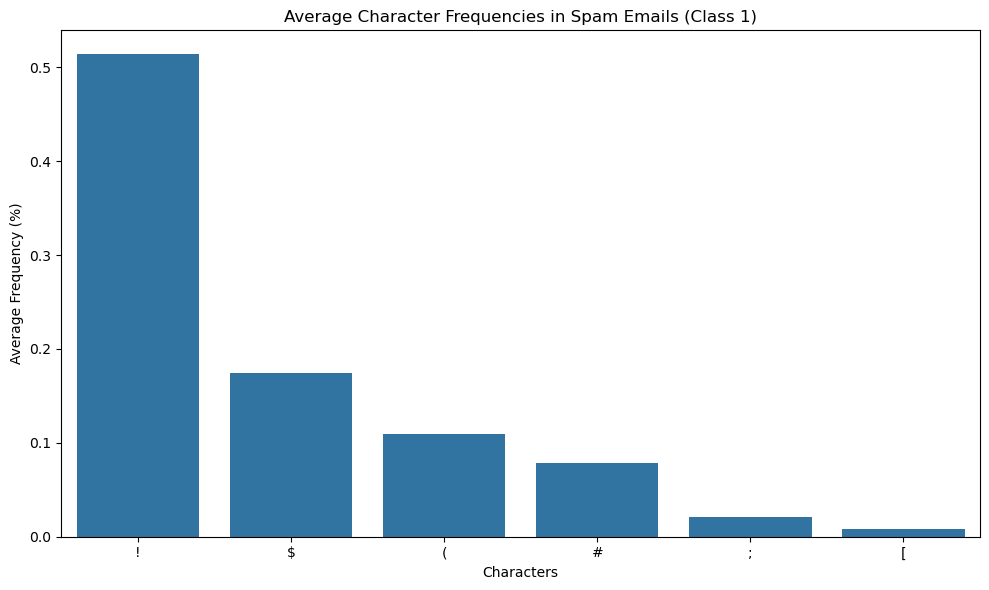

In [10]:
# Plot distribution for Spam emails (Class 1)
plot_char_freq_distribution(df[df['Class'] == 1], "Average Character Frequencies in Spam Emails (Class 1)")

# 3. Data Preparation

# 4. Data Modeling

# 5. Evaluation

# 6. Deployment

# References

Almeida, T. A., Almeida, J. M., & Yamakami, A. (2011). Spam filtering: How the dimensionality reduction affects the accuracy of classifiers. *Information Sciences*, 181(6), 1138-1152. https://jisajournal.springeropen.com/articles/10.1007/s13174-010-0014-7

Guzella, T. S., & Caminhas, W. M. (2009). A review of machine learning approaches to spam filtering. Expert Systems with Applications, 36(7), 10206-10222. https://www.sciencedirect.com/science/article/abs/pii/S095741740900181X

He, H., & Garcia, E. A. (2009). Learning from imbalanced data.* IEEE Transactions on Knowledge and Data Engineering*, 21(9), 1263-1284. https://doi.org/10.1109/TKDE.2008.239

Hopkins, M., Reeber, E., Forman, G., & Suermondt, J. (1999). Spambase dataset. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/94/spambase

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: with Applications in R (1st ed.)*. Springer. https://doi.org/10.1007/978-1-4614-7138-7

Johnson, J. M., & Khoshgoftaar, T. M. (2019). Survey on deep learning with class imbalance. *Journal of Big Data*, 6(1), 27. https://doi.org/10.1186/s40537-019-0192-5

Kirvan, P., Awati, R., & Teravainen, T. (2024). What is email spam and how to fight it? TechTarget. https://www.techtarget.com/searchsecurity/definition/spam

Kuhn, M., & Johnson, K. (2019). *Feature Engineering and Selection: A Practical Approach for Predictive Models*. CRC Press.

Metsis, V., Androutsopoulos, I., & Paliouras, G. (2006). Spam filtering with naive Bayes-which naive Bayes? *CEAS 2006 - Third Conference on Email and Anti-Spam.*

Sennewald, C. A., & Baillie, C. (2016). Computers and effective security management. *Effective security management* (6th ed., pp. 235–249). Elsevier.